## 6.6: Sourcing & Analyzing Time Series Data

### This script contains the following:
1. Import libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Line-chart Data
4. Time-series analysis: decomposition
5. Stationarity Test
6. Stationarizing the Data

NOTE: This Data is downloaded from https://ec.europa.eu/eurostat/databrowser/view/TOUR_OCC_MNOR__custom_3522408/default/table?lang=en . It contains monthly data of Net occupancy rate of bed-places and bedrooms in hotels and similar accommodation in Germany(NACE Rev. 2, I, 55.1).

### 1. Import Libraries and Data

In [124]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [125]:
# Define Path
path = r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\3 Data\Original Data'
path1 =r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\4 Analytics\Visualizations'

In [126]:
# Import Data
data = pd.read_csv(os.path.join(path,'tour_occ_mnor__custom_3522408_linear.csv'),  index_col=0)

In [127]:
# Display rows and columns
data.shape

(518, 8)

In [128]:
# Display details
data.head(10)

,LAST UPDATE,freq,accomunit,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
DATAFLOW,,,,,,,,
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-01,24.5,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-02,29.6,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-03,30.0,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-04,34.4,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-05,43.0,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-06,46.2,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-07,49.5,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-08,51.4,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/23 23:00:00,Monthly,Bedplaces,Percentage,Germany,1990-09,53.3,NaN


### 2. Subsetting, wrangling, and cleaning time-series data

In [129]:
# Keeping just needed columns
df = data[['TIME_PERIOD', "OBS_VALUE"]]

NOTE: This will limit it to just the nights spent and the months, the only things I can reasonably measure here. I already limited the data in other ways (like the timeframe) in generating the data as described above.

In [130]:
df.head()

,TIME_PERIOD,OBS_VALUE
DATAFLOW,,
ESTAT:TOUR_OCC_MNOR(1.0),1990-01,24.5
ESTAT:TOUR_OCC_MNOR(1.0),1990-02,29.6
ESTAT:TOUR_OCC_MNOR(1.0),1990-03,30.0
ESTAT:TOUR_OCC_MNOR(1.0),1990-04,34.4
ESTAT:TOUR_OCC_MNOR(1.0),1990-05,43.0


In [131]:
df.shape

(518, 2)

In [132]:
# Rename the columns name
df = df.rename(columns = {'TIME_PERIOD':'Date', 'OBS_VALUE': 'occ_rate'})

In [133]:
df.columns

Index(['Date', 'occ_rate'], dtype='object')

In [134]:
# SET date AS INDEX
data_2 = df.set_index("Date")
data_2.index = pd.to_datetime(data_2.index)
data_2.head()

,occ_rate
Date,
1990-01-01,24.5
1990-02-01,29.6
1990-03-01,30.0
1990-04-01,34.4
1990-05-01,43.0


In [135]:
# Data type
type(data_2)

pandas.core.frame.DataFrame

In [136]:
# Check for missing values
data_2.isnull().sum()

occ_rate    0
dtype: int64

In [137]:
# Check for duplicates
dups = data_2.duplicated()
dups.shape # No Dups

(518,)

### 3. Line Chart of Data

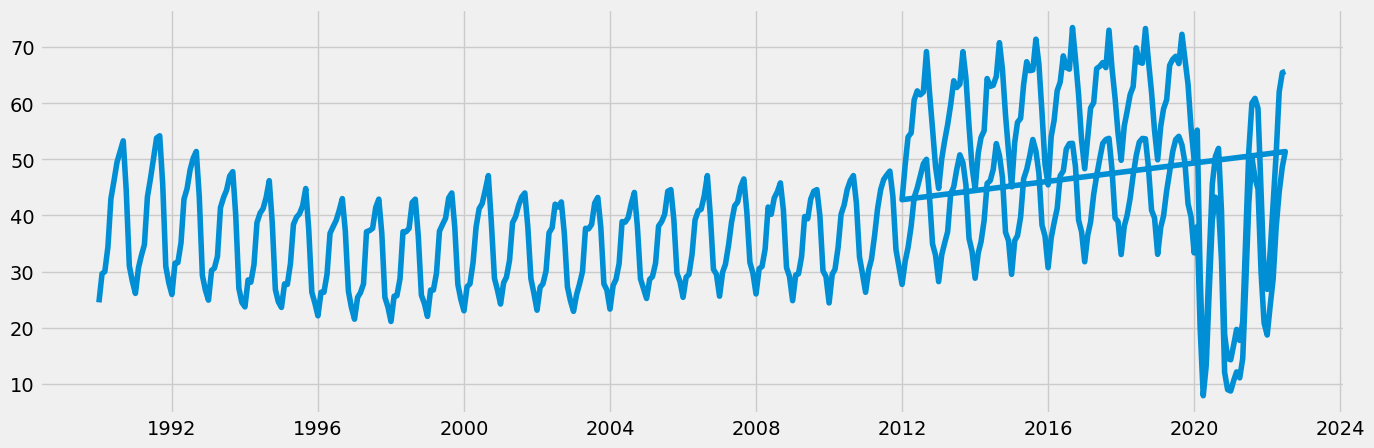

In [138]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

# The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM

In [91]:
# Reset index to use the "Date" column as a filter
data_3 = data_2.reset_index()

In [106]:
data_3.head()

,Date,Value
0,1990-01-01,24.5
1,1990-02-01,29.6
2,1990-03-01,30.0
3,1990-04-01,34.4
4,1990-05-01,43.0


In [150]:
# Creating subset of data with relevant time only
data_sub = data_3.loc[(data_3['Date'] >= '2010-01-01') & (data_3['Date'] < '2024-01-01')]

NOTE: Year from 2010 to 2022 is taken for analysis, as Airbnb was founded in 2007 with different name 'Airbed and Breakfast' and during 2009 name was changed to Airbnb and during 2010 app was lunched for instant booking. So we are analysing the net-occupancy of bedrooms and bed places after the lunched of Airbnb.

In [151]:
data_sub.shape

(278, 2)

In [152]:
data_sub.head()

,Date,Value
240,2010-01-01,24.4
241,2010-02-01,29.5
242,2010-03-01,30.4
243,2010-04-01,34.3
244,2010-05-01,40.2


In [153]:
# set the 'Date' column as the index
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis = 1, inplace = True)
data_sub.head()

,Value
datetime,
2010-01-01,24.4
2010-02-01,29.5
2010-03-01,30.4
2010-04-01,34.3
2010-05-01,40.2


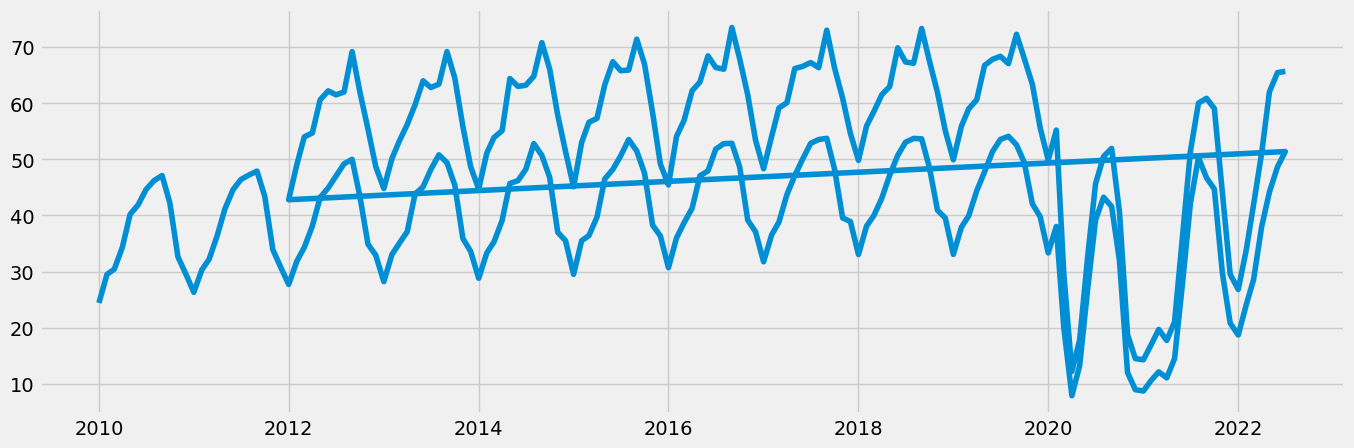

In [154]:
# plot the data
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_sub)

In [155]:
# Check for missing values (you shouldn't have any)
data_sub.isnull().sum() 

Value    0
dtype: int64

In [158]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

24

In [160]:
# Drop Duplicates from the data
dups.drop_duplicates(keep=False)

Series([], dtype: bool)

In [161]:
# Drop Duplicates from the data
data_sub.drop_duplicates(keep=False)

,Value
datetime,
2010-01-01,24.40
2010-03-01,30.40
2010-05-01,40.20
2010-06-01,41.90
2010-10-01,42.20
...,...
2022-02-01,33.88
2022-03-01,41.93
2022-05-01,62.03


In [168]:
data_sub.dropna()

,Value
2010-01-01,24.40
2010-01-02,29.50
2010-01-03,30.40
2010-01-04,34.30
2010-01-05,40.20
...,...
2010-10-01,41.93
2010-10-02,51.10
2010-10-03,62.03
2010-10-04,65.46


### 4. Time-series analysis: decomposition

In [171]:
# Decompose the time series using an additive model
data_sub.index = pd.date_range(start='2010-01-01', periods=len(data_sub), freq='D')
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

NOTE: Tried setting dates, tried parameter none, tried without, still I could not make the plot for all years. Tried after the below and it gave me for 2010. I will make info about this year

In [165]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18,7

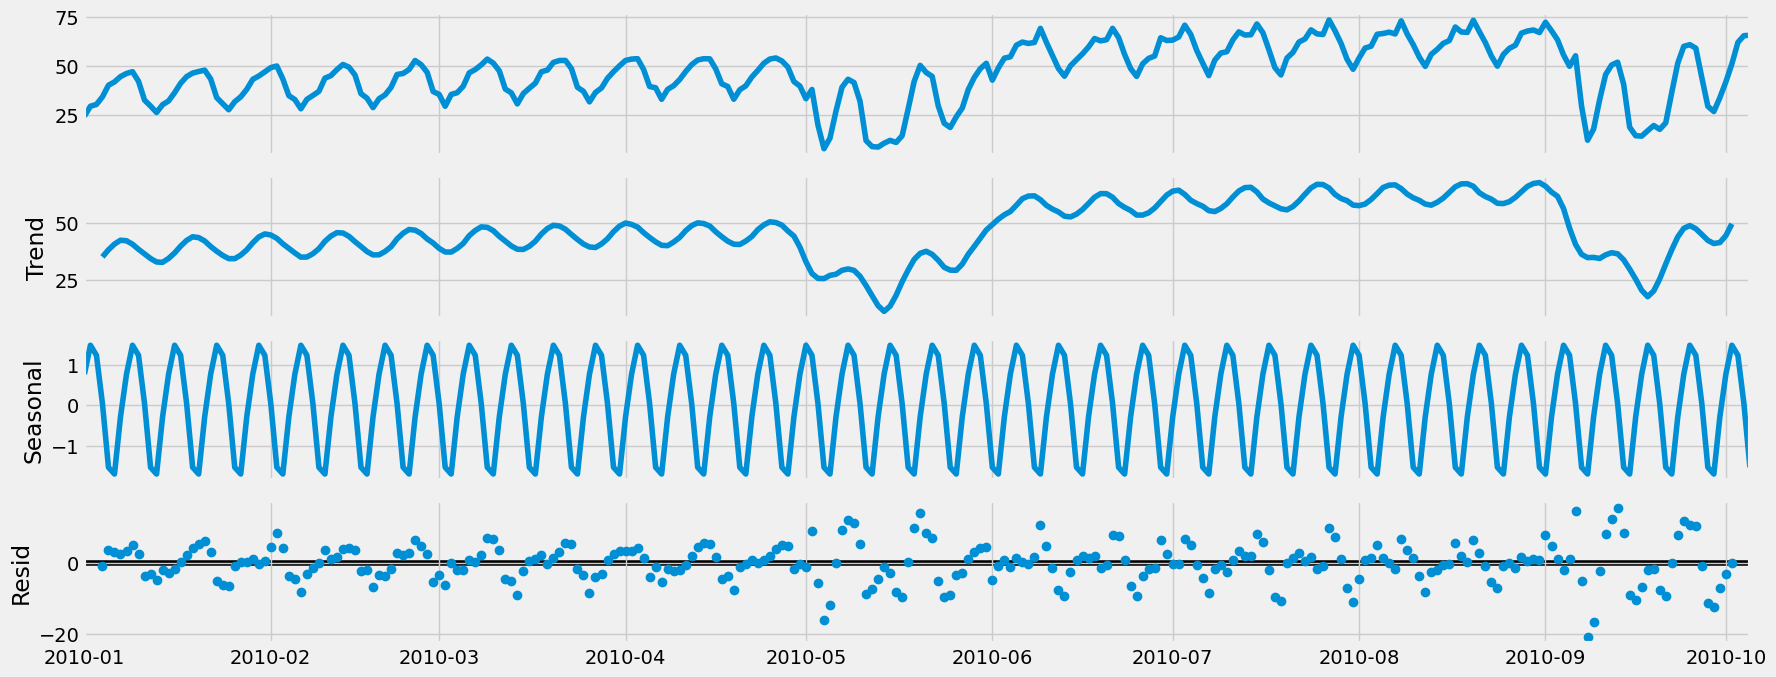

In [166]:
decomposition.plot()
plt.show()

NOTE:
trend: positive trend with variances
seasonality: can't exactly say being just on 2010
I would expect this data to be non-stationary because there is a clear upwards trend.

There appears to be some noise from due to data fluctuations.

### 5. Stationarity Test

#### a. Dickey-Fuller Test

In [174]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary Test:')
    test = adfuller(timeseries, autolag ='AIC')
    result = pd.Series(test[0:4], index=['Test Statistics',
                                        'p_value',
                                        'Number of lags Used',
                                        'Number of Observation Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print(result)
    
    # Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationary Test:
Test Statistics                -3.128758
p_value                         0.024497
Number of lags Used            16.000000
Number of Observation Used    261.000000
Critical Value (1%)            -3.455656
Critical Value (5%)            -2.872678
Critical Value (10%)           -2.572705
dtype: float64


##### H0 = Presence of a unit root (non-stationary)
#####  HA = Unit root present (stationary)
The test statistic of -3.128758 is larger than the critical value (5%) of -2.877735. P-value is less than 0.05

#### b. Autocorrelation Test

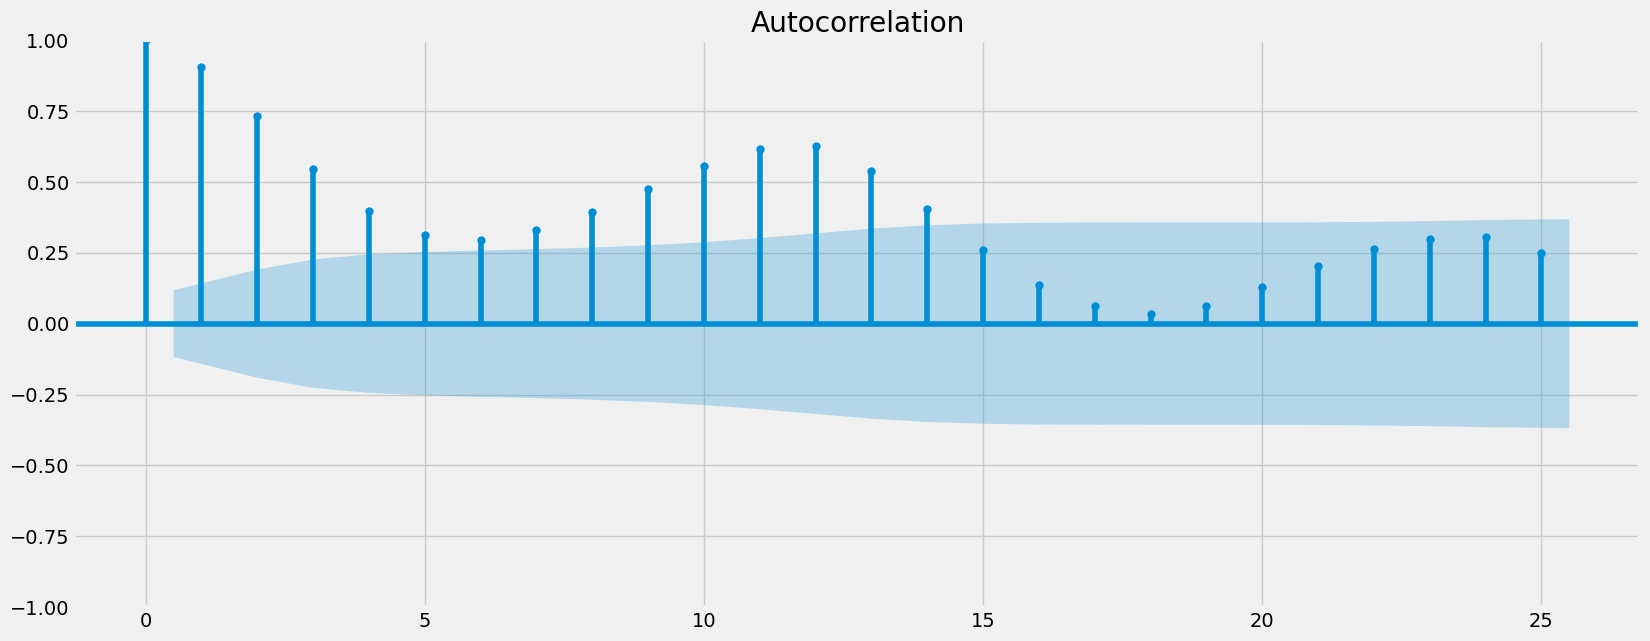

In [175]:
# Check out for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub)
plt.show()

### 6. Stationarizing the Data

In [176]:
data_diff = data_sub - data_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [177]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [178]:
data_diff.head()

,Value
2010-01-02,5.1
2010-01-03,0.9
2010-01-04,3.9
2010-01-05,5.9
2010-01-06,1.7


In [179]:
data_diff.columns

Index(['Value'], dtype='object')

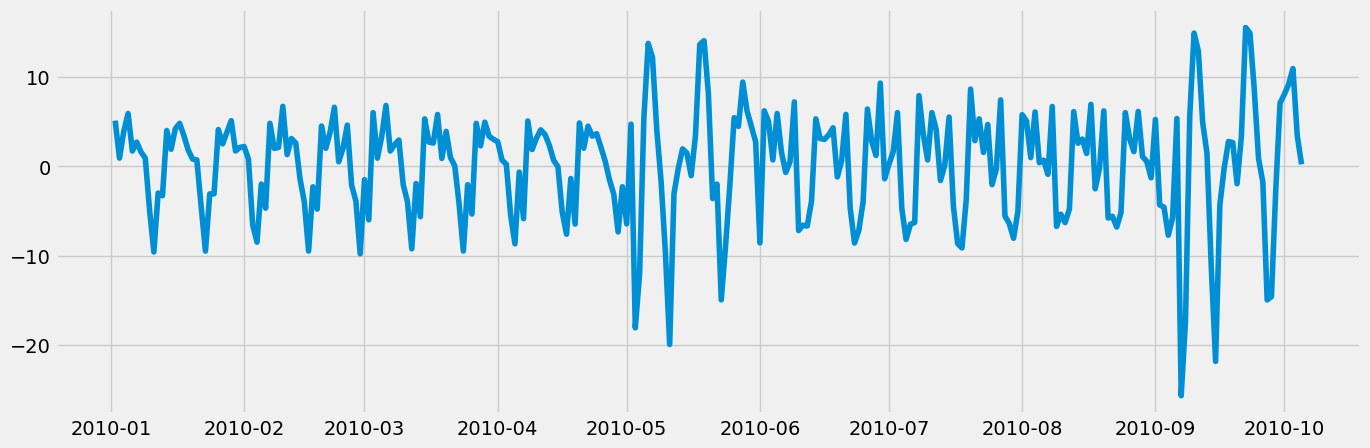

In [180]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [181]:
dickey_fuller(data_diff)

Dickey-Fuller Stationary Test:
Test Statistics                -4.562789
p_value                         0.000151
Number of lags Used            12.000000
Number of Observation Used    264.000000
Critical Value (1%)            -3.455365
Critical Value (5%)            -2.872551
Critical Value (10%)           -2.572638
dtype: float64


NOTE: P-value now is less than 0.05

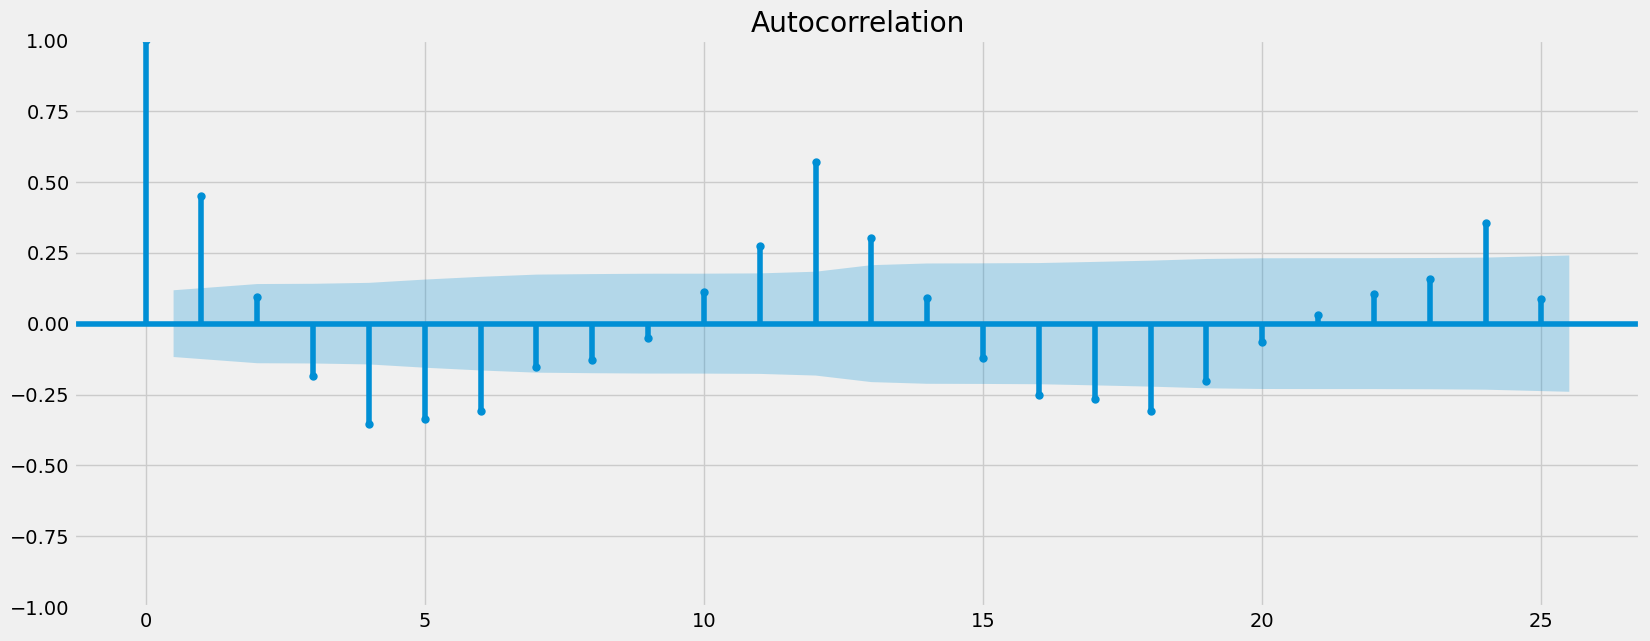

In [182]:
plot_acf(data_diff)
plt.show()